In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
digits.data.shape

(1797, 64)

In [5]:
digits.target.shape

(1797,)

In [20]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [27]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis = 1), df.target, test_size=0.3)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors': [3, 5, 7, 10, 13]
}, cv = 5, return_train_score=False)
knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 10, 13]})

In [52]:
results = pd.DataFrame(knn.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004308,0.000973,0.016142,0.003010,3,{'n_neighbors': 3},0.984127,0.992063,0.996016,0.996016,0.992032,0.992051,0.004341,1
1,0.003092,0.000077,0.013673,0.000571,5,{'n_neighbors': 5},0.972222,0.980159,0.988048,0.996016,0.984064,0.984102,0.007927,2
2,0.003075,0.000116,0.013786,0.000369,7,{'n_neighbors': 7},0.972222,0.976190,0.984064,0.992032,0.980080,0.980918,0.006813,3
3,0.003112,0.000038,0.013745,0.000336,10,{'n_neighbors': 10},0.960317,0.964286,0.984064,0.984064,0.980080,0.974562,0.010193,4
4,0.003032,0.000050,0.013540,0.000115,13,{'n_neighbors': 13},0.956349,0.948413,0.980080,0.984064,0.972112,0.968203,0.013712,5


In [53]:
results[['params','mean_test_score']]

,params,mean_test_score
0,{'n_neighbors': 3},0.992051
1,{'n_neighbors': 5},0.984102
2,{'n_neighbors': 7},0.980918
3,{'n_neighbors': 10},0.974562
4,{'n_neighbors': 13},0.968203


In [54]:
knn.best_params_

{'n_neighbors': 3}

In [55]:
knn.best_score_

0.9920508442420793

Text(42.0, 0.5, 'Truth')

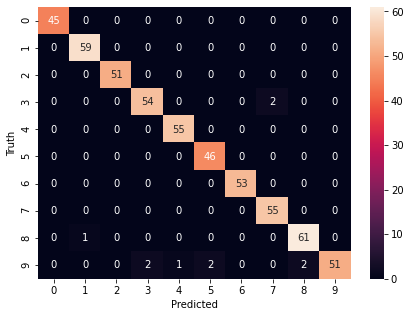

In [59]:
from sklearn.metrics import confusion_matrix
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        59
           2       1.00      1.00      1.00        51
           3       0.96      0.96      0.96        56
           4       0.98      1.00      0.99        55
           5       0.96      1.00      0.98        46
           6       1.00      1.00      1.00        53
           7       0.96      1.00      0.98        55
           8       0.97      0.98      0.98        62
           9       1.00      0.88      0.94        58

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



### for highly structured data  a smaller K is better (like this example, or handwritting/ speech recognition), but for noisy data it is recommended using a bigger K.